# Read Punk Bands List

In [154]:
import pandas as pd
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# List from https://en.wikipedia.org/wiki/List_of_punk_rock_bands,_0–K
# and https://en.wikipedia.org/wiki/List_of_punk_rock_bands,_L–Z
bands = pd.read_excel('Wikipedia Punk Bands Full.xls')
bands.head(10)

,Band name,Origin,Years active,Brief summary
0,44,"Los Angeles, California, USA",2005–2009,A pop punk/alternative rock band named after t...
1,108,"New York, New York, USA","1991–96, 2005–present",A post-hardcore band with music inspired by th...
2,999,"London, England, UK",1976–present,A classic punk band from England.
3,1208,"Hermosa Beach, California, USA",1996–2005,"A melodic punk band started by Alex Flynn, who..."
4,!Action Pact!,"Stanwell, London, England, UK",1981–86,Aggressive English punk band.
5,…But Alive,"Hamburg, Germany",1992–99,"A political punk rock band, signed with G7 Wel..."
6,1983. Field Marshal Slug. Wales. 1983-1986.,NaN,NaN,NaN
7,2 Minutos,"Valentín Alsina, Argentina",1987–present,A street punk band.
8,25 ta Life,"Queens, New York, USA",1991–present,NaN
9,28 Days,"Frankston, Melbourne, Australia","1997–2007, 2009–present",A punk/rapcore band.


In [13]:
bands_usa = bands[bands.Origin.str.contains('USA', na=False)]
bands_usa.head(10)

,Band name,Origin,Years active,Brief summary
0,44,"Los Angeles, California, USA",2005–2009,A pop punk/alternative rock band named after t...
1,108,"New York, New York, USA","1991–96, 2005–present",A post-hardcore band with music inspired by th...
3,1208,"Hermosa Beach, California, USA",1996–2005,"A melodic punk band started by Alex Flynn, who..."
8,25 ta Life,"Queens, New York, USA",1991–present,NaN
10,30 Foot Fall,"Houston, Texas, USA",1993–present,NaN
11,45 Grave,"Los Angeles, California, USA","1979–85, 1989–91, 2005–present",A horror punk/deathrock band.
15,7 Seconds,"Reno, Nevada, USA",1980–present,A straight edge melodic hardcore band who pion...
16,88 Fingers Louie,"Chicago, Illinois, USA","1993–96, 1998–99",A melodic hardcore band.
17,98 Mute,"Hermosa Beach, California, USA",1993–2002,A street punk band.
18,A Change of Pace,"Peoria, Arizona, USA",2001–2011,NaN


In [24]:
url = 'http://api.metrolyrics.com/v1//multisearch/all/X-API-KEY/196f657a46afb63ce3fd2015b9ed781280337ea7/format/json?find=ramones&theme=desktop&category=artistsong&limit=1500'

response = requests.get(url=url)
json = response.json()
json

{'find': 'ramones',
 'results': {'albums': {'c': 0, 'd': []},
  'artists': {'c': 0, 'd': []},
  'lyrics': {'c': 0, 'd': []},
  'news': {'c': 0, 'd': []},
  'songs': {'c': 259,
   'd': [{'i': '',
     'p': 'The <em>Ramones</em><br />Hey Ho, Lets Go!',
     'q': 48161493,
     'u': 'hey-ho-lets-go-lyrics-the-ramones.html'},
    {'i': 'http://netstorage.metrolyrics.com/albums/2920-ramones-ramones.jpg',
     'p': 'The <em>Ramones</em><br />Blitzkrieg Bop',
     'q': 36342,
     'u': 'blitzkrieg-bop-lyrics-the-ramones.html'},
    {'i': 'http://netstorage.metrolyrics.com/albums/2923-ramones-road-to-ruin.jpg',
     'p': 'The <em>Ramones</em><br />I Wanna Be Sedated',
     'q': 36366,
     'u': 'i-wanna-be-sedated-lyrics-the-ramones.html'},
    {'i': 'http://netstorage.metrolyrics.com/albums/2922-ramones-rocket-to-russia.jpg',
     'p': "The <em>Ramones</em><br />Surfin' Bird",
     'q': 40313,
     'u': 'surfin-bird-lyrics-the-ramones.html'},
    {'i': '',
     'p': 'The <em>Ramones</em><br /

In [32]:
lyrics = json['results']['songs']['d']

for block in lyrics:
    block['artist'] = block['p'].split('<br />')[0]
    block['track_name'] = block['p'].split('<br />')[1]
    block['lyrics_link'] = 'http://www.metrolyrics.com/' + block['u']

lyrics

[{'artist': 'The <em>Ramones</em>',
  'i': '',
  'lyrics_link': 'http://www.metrolyrics.com/hey-ho-lets-go-lyrics-the-ramones.html',
  'p': 'The <em>Ramones</em><br />Hey Ho, Lets Go!',
  'q': 48161493,
  'track_name': 'Hey Ho, Lets Go!',
  'u': 'hey-ho-lets-go-lyrics-the-ramones.html'},
 {'artist': 'The <em>Ramones</em>',
  'i': 'http://netstorage.metrolyrics.com/albums/2920-ramones-ramones.jpg',
  'lyrics_link': 'http://www.metrolyrics.com/blitzkrieg-bop-lyrics-the-ramones.html',
  'p': 'The <em>Ramones</em><br />Blitzkrieg Bop',
  'q': 36342,
  'track_name': 'Blitzkrieg Bop',
  'u': 'blitzkrieg-bop-lyrics-the-ramones.html'},
 {'artist': 'The <em>Ramones</em>',
  'i': 'http://netstorage.metrolyrics.com/albums/2923-ramones-road-to-ruin.jpg',
  'lyrics_link': 'http://www.metrolyrics.com/i-wanna-be-sedated-lyrics-the-ramones.html',
  'p': 'The <em>Ramones</em><br />I Wanna Be Sedated',
  'q': 36366,
  'track_name': 'I Wanna Be Sedated',
  'u': 'i-wanna-be-sedated-lyrics-the-ramones.html

In [37]:
lyrics_df = pd.DataFrame(lyrics)
ramones_df = lyrics_df[lyrics_df.artist.str.contains('Ramones')]
ramones_df

,artist,i,lyrics_link,p,q,track_name,u
0,The <em>Ramones</em>,,http://www.metrolyrics.com/hey-ho-lets-go-lyri...,"The <em>Ramones</em><br />Hey Ho, Lets Go!",48161493,"Hey Ho, Lets Go!",hey-ho-lets-go-lyrics-the-ramones.html
1,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2920-...,http://www.metrolyrics.com/blitzkrieg-bop-lyri...,The <em>Ramones</em><br />Blitzkrieg Bop,36342,Blitzkrieg Bop,blitzkrieg-bop-lyrics-the-ramones.html
2,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2923-...,http://www.metrolyrics.com/i-wanna-be-sedated-...,The <em>Ramones</em><br />I Wanna Be Sedated,36366,I Wanna Be Sedated,i-wanna-be-sedated-lyrics-the-ramones.html
3,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2922-...,http://www.metrolyrics.com/surfin-bird-lyrics-...,The <em>Ramones</em><br />Surfin' Bird,40313,Surfin' Bird,surfin-bird-lyrics-the-ramones.html
4,The <em>Ramones</em>,,http://www.metrolyrics.com/bonzo-goes-to-bitbu...,The <em>Ramones</em><br />Bonzo Goes To Bitburg,38383,Bonzo Goes To Bitburg,bonzo-goes-to-bitburg-lyrics-the-ramones.html
5,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2924-...,http://www.metrolyrics.com/baby-i-love-you-lyr...,The <em>Ramones</em><br />Baby I Love You,39316,Baby I Love You,baby-i-love-you-lyrics-the-ramones.html
6,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/39352...,http://www.metrolyrics.com/blitzkreig-bop-lyri...,The <em>Ramones</em><br />Blitzkreig Bop,2147479472,Blitzkreig Bop,blitzkreig-bop-lyrics-the-ramones.html
7,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2930-...,http://www.metrolyrics.com/pet-sematary-lyrics...,The <em>Ramones</em><br />Pet Sematary,189520,Pet Sematary,pet-sematary-lyrics-the-ramones.html
8,The <em>Ramones</em>,,http://www.metrolyrics.com/i-dont-want-to-live...,The <em>Ramones</em><br />I Don't Want To Live...,12059288,I Don't Want To Live This Life (Anymore),i-dont-want-to-live-this-life-anymore-lyrics-r...
9,The <em>Ramones</em>,,http://www.metrolyrics.com/my-sharona-lyrics-t...,The <em>Ramones</em><br />My Sharona,748245,My Sharona,my-sharona-lyrics-the-ramones.html


In [45]:
ramones_df = ramones_df.drop_duplicates(subset='track_name', keep='first')
ramones_df

,artist,i,lyrics_link,p,q,track_name,u
0,The <em>Ramones</em>,,http://www.metrolyrics.com/hey-ho-lets-go-lyri...,"The <em>Ramones</em><br />Hey Ho, Lets Go!",48161493,"Hey Ho, Lets Go!",hey-ho-lets-go-lyrics-the-ramones.html
1,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2920-...,http://www.metrolyrics.com/blitzkrieg-bop-lyri...,The <em>Ramones</em><br />Blitzkrieg Bop,36342,Blitzkrieg Bop,blitzkrieg-bop-lyrics-the-ramones.html
2,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2923-...,http://www.metrolyrics.com/i-wanna-be-sedated-...,The <em>Ramones</em><br />I Wanna Be Sedated,36366,I Wanna Be Sedated,i-wanna-be-sedated-lyrics-the-ramones.html
3,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2922-...,http://www.metrolyrics.com/surfin-bird-lyrics-...,The <em>Ramones</em><br />Surfin' Bird,40313,Surfin' Bird,surfin-bird-lyrics-the-ramones.html
4,The <em>Ramones</em>,,http://www.metrolyrics.com/bonzo-goes-to-bitbu...,The <em>Ramones</em><br />Bonzo Goes To Bitburg,38383,Bonzo Goes To Bitburg,bonzo-goes-to-bitburg-lyrics-the-ramones.html
5,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2924-...,http://www.metrolyrics.com/baby-i-love-you-lyr...,The <em>Ramones</em><br />Baby I Love You,39316,Baby I Love You,baby-i-love-you-lyrics-the-ramones.html
6,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/39352...,http://www.metrolyrics.com/blitzkreig-bop-lyri...,The <em>Ramones</em><br />Blitzkreig Bop,2147479472,Blitzkreig Bop,blitzkreig-bop-lyrics-the-ramones.html
7,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2930-...,http://www.metrolyrics.com/pet-sematary-lyrics...,The <em>Ramones</em><br />Pet Sematary,189520,Pet Sematary,pet-sematary-lyrics-the-ramones.html
8,The <em>Ramones</em>,,http://www.metrolyrics.com/i-dont-want-to-live...,The <em>Ramones</em><br />I Don't Want To Live...,12059288,I Don't Want To Live This Life (Anymore),i-dont-want-to-live-this-life-anymore-lyrics-r...
9,The <em>Ramones</em>,,http://www.metrolyrics.com/my-sharona-lyrics-t...,The <em>Ramones</em><br />My Sharona,748245,My Sharona,my-sharona-lyrics-the-ramones.html


In [38]:
ramones_lyrics = ramones_df.lyrics_link.tolist()
ramones_lyrics

['http://www.metrolyrics.com/hey-ho-lets-go-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/blitzkrieg-bop-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/i-wanna-be-sedated-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/surfin-bird-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/bonzo-goes-to-bitburg-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/baby-i-love-you-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/blitzkreig-bop-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/pet-sematary-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/i-dont-want-to-live-this-life-anymore-lyrics-ramones.html',
 'http://www.metrolyrics.com/my-sharona-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/rockaway-beach-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/poison-heart-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/judy-is-a-punk-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/i-want-you-around-lyrics-the-ramones.html

In [40]:
ramones_df.lyrics_link.tolist

<bound method Series.tolist of 0      http://www.metrolyrics.com/hey-ho-lets-go-lyri...
1      http://www.metrolyrics.com/blitzkrieg-bop-lyri...
2      http://www.metrolyrics.com/i-wanna-be-sedated-...
3      http://www.metrolyrics.com/surfin-bird-lyrics-...
4      http://www.metrolyrics.com/bonzo-goes-to-bitbu...
5      http://www.metrolyrics.com/baby-i-love-you-lyr...
6      http://www.metrolyrics.com/blitzkreig-bop-lyri...
7      http://www.metrolyrics.com/pet-sematary-lyrics...
8      http://www.metrolyrics.com/i-dont-want-to-live...
9      http://www.metrolyrics.com/my-sharona-lyrics-t...
10     http://www.metrolyrics.com/rockaway-beach-lyri...
11     http://www.metrolyrics.com/poison-heart-lyrics...
12     http://www.metrolyrics.com/judy-is-a-punk-lyri...
13     http://www.metrolyrics.com/i-want-you-around-l...
14     http://www.metrolyrics.com/havana-affair-lyric...
15     http://www.metrolyrics.com/commando-lyrics-the...
16     http://www.metrolyrics.com/the-kkk-took-my-bab...


In [44]:
ramones_df.lyrics_link.unique().tolist()

['http://www.metrolyrics.com/hey-ho-lets-go-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/blitzkrieg-bop-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/i-wanna-be-sedated-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/surfin-bird-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/bonzo-goes-to-bitburg-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/baby-i-love-you-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/blitzkreig-bop-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/pet-sematary-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/i-dont-want-to-live-this-life-anymore-lyrics-ramones.html',
 'http://www.metrolyrics.com/my-sharona-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/rockaway-beach-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/poison-heart-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/judy-is-a-punk-lyrics-the-ramones.html',
 'http://www.metrolyrics.com/i-want-you-around-lyrics-the-ramones.html

In [51]:
response = requests.get('http://www.metrolyrics.com/take-it-as-it-comes-lyrics-the-ramones.html')
doc = BeautifulSoup(response.text, 'html.parser')

In [67]:
verses = doc.find_all(class_='verse')
lyrics_lines = ' '.join([verse.text for verse in verses]).replace('\n', '. ')
lyrics_lines

"Time to live, time to lie. Time to laugh, time to die Take it easy baby. Take it as it comes. Don't move too fast. If you want your love to last. You've been moving much too fast Time to walk, time to run. Time to aim your arrows at the sun Go real slow. You'll like it more and more. Take it as it comes. Specialize in having fun Moving much too fast. Moving much too fast"

In [98]:
def get_lyrics(row):
    url = row.lyrics_link
    response = requests.get(url)
    doc = BeautifulSoup(response.text, 'html.parser')
    verses = doc.find_all(class_='verse')
    lyrics_lines = ' '.join([verse.text for verse in verses]).replace('\n', '. ')
    return lyrics_lines
    
ramones_df['lyrics_lines'] = ramones_df.apply(get_lyrics, axis=1)
ramones_df

,artist,i,lyrics_link,p,q,track_name,u,lyrics_lines
0,The <em>Ramones</em>,,http://www.metrolyrics.com/hey-ho-lets-go-lyri...,"The <em>Ramones</em><br />Hey Ho, Lets Go!",48161493,"Hey Ho, Lets Go!",hey-ho-lets-go-lyrics-the-ramones.html,"Hey Ho, Lets Go. Hey Ho, Lets Go. Hey Ho, Lets..."
1,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2920-...,http://www.metrolyrics.com/blitzkrieg-bop-lyri...,The <em>Ramones</em><br />Blitzkrieg Bop,36342,Blitzkrieg Bop,blitzkrieg-bop-lyrics-the-ramones.html,"Hey ho, let's go! hey ho, let's go!. Hey ho, l..."
2,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2923-...,http://www.metrolyrics.com/i-wanna-be-sedated-...,The <em>Ramones</em><br />I Wanna Be Sedated,36366,I Wanna Be Sedated,i-wanna-be-sedated-lyrics-the-ramones.html,Twenty twenty twenty four hours to go. I wanna...
3,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2922-...,http://www.metrolyrics.com/surfin-bird-lyrics-...,The <em>Ramones</em><br />Surfin' Bird,40313,Surfin' Bird,surfin-bird-lyrics-the-ramones.html,A-well-a ev'rybody's heard about the bird bird...
4,The <em>Ramones</em>,,http://www.metrolyrics.com/bonzo-goes-to-bitbu...,The <em>Ramones</em><br />Bonzo Goes To Bitburg,38383,Bonzo Goes To Bitburg,bonzo-goes-to-bitburg-lyrics-the-ramones.html,"You've got to pick up the pieces. Come on, sor..."
5,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2924-...,http://www.metrolyrics.com/baby-i-love-you-lyr...,The <em>Ramones</em><br />Baby I Love You,39316,Baby I Love You,baby-i-love-you-lyrics-the-ramones.html,Have I ever told you. How good it feels to hol...
6,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/39352...,http://www.metrolyrics.com/blitzkreig-bop-lyri...,The <em>Ramones</em><br />Blitzkreig Bop,2147479472,Blitzkreig Bop,blitzkreig-bop-lyrics-the-ramones.html,"Hey ho, let's go. Hey ho, let's go. Hey ho, le..."
7,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2930-...,http://www.metrolyrics.com/pet-sematary-lyrics...,The <em>Ramones</em><br />Pet Sematary,189520,Pet Sematary,pet-sematary-lyrics-the-ramones.html,"Under the arc of a weather stain boards,. Anci..."
8,The <em>Ramones</em>,,http://www.metrolyrics.com/i-dont-want-to-live...,The <em>Ramones</em><br />I Don't Want To Live...,12059288,I Don't Want To Live This Life (Anymore),i-dont-want-to-live-this-life-anymore-lyrics-r...,Now that you're gone. I feel the pain. My hear...
9,The <em>Ramones</em>,,http://www.metrolyrics.com/my-sharona-lyrics-t...,The <em>Ramones</em><br />My Sharona,748245,My Sharona,my-sharona-lyrics-the-ramones.html,[Originally by The Knack] Oo my little pretty ...


In [102]:
ramones_df = ramones_df[ramones_df['lyrics_lines'] != '']
ramones_df

,artist,i,lyrics_link,p,q,track_name,u,lyrics_lines
0,The <em>Ramones</em>,,http://www.metrolyrics.com/hey-ho-lets-go-lyri...,"The <em>Ramones</em><br />Hey Ho, Lets Go!",48161493,"Hey Ho, Lets Go!",hey-ho-lets-go-lyrics-the-ramones.html,"Hey Ho, Lets Go. Hey Ho, Lets Go. Hey Ho, Lets..."
1,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2920-...,http://www.metrolyrics.com/blitzkrieg-bop-lyri...,The <em>Ramones</em><br />Blitzkrieg Bop,36342,Blitzkrieg Bop,blitzkrieg-bop-lyrics-the-ramones.html,"Hey ho, let's go! hey ho, let's go!. Hey ho, l..."
2,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2923-...,http://www.metrolyrics.com/i-wanna-be-sedated-...,The <em>Ramones</em><br />I Wanna Be Sedated,36366,I Wanna Be Sedated,i-wanna-be-sedated-lyrics-the-ramones.html,Twenty twenty twenty four hours to go. I wanna...
3,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2922-...,http://www.metrolyrics.com/surfin-bird-lyrics-...,The <em>Ramones</em><br />Surfin' Bird,40313,Surfin' Bird,surfin-bird-lyrics-the-ramones.html,A-well-a ev'rybody's heard about the bird bird...
4,The <em>Ramones</em>,,http://www.metrolyrics.com/bonzo-goes-to-bitbu...,The <em>Ramones</em><br />Bonzo Goes To Bitburg,38383,Bonzo Goes To Bitburg,bonzo-goes-to-bitburg-lyrics-the-ramones.html,"You've got to pick up the pieces. Come on, sor..."
5,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2924-...,http://www.metrolyrics.com/baby-i-love-you-lyr...,The <em>Ramones</em><br />Baby I Love You,39316,Baby I Love You,baby-i-love-you-lyrics-the-ramones.html,Have I ever told you. How good it feels to hol...
6,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/39352...,http://www.metrolyrics.com/blitzkreig-bop-lyri...,The <em>Ramones</em><br />Blitzkreig Bop,2147479472,Blitzkreig Bop,blitzkreig-bop-lyrics-the-ramones.html,"Hey ho, let's go. Hey ho, let's go. Hey ho, le..."
7,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2930-...,http://www.metrolyrics.com/pet-sematary-lyrics...,The <em>Ramones</em><br />Pet Sematary,189520,Pet Sematary,pet-sematary-lyrics-the-ramones.html,"Under the arc of a weather stain boards,. Anci..."
8,The <em>Ramones</em>,,http://www.metrolyrics.com/i-dont-want-to-live...,The <em>Ramones</em><br />I Don't Want To Live...,12059288,I Don't Want To Live This Life (Anymore),i-dont-want-to-live-this-life-anymore-lyrics-r...,Now that you're gone. I feel the pain. My hear...
9,The <em>Ramones</em>,,http://www.metrolyrics.com/my-sharona-lyrics-t...,The <em>Ramones</em><br />My Sharona,748245,My Sharona,my-sharona-lyrics-the-ramones.html,[Originally by The Knack] Oo my little pretty ...


In [103]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(vocabulary=emolex_df.word, use_idf=False, norm='l1')
matrix = vec.fit_transform(ramones_df['lyrics_lines'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
angry_words = emolex_df[emolex_df.anger == 1]['word']
angry_words.head()

3       abandoned
4     abandonment
17          abhor
18      abhorrent
27        abolish
Name: word, dtype: object

In [109]:
fearful_words = emolex_df[emolex_df.fear == 1]['word']
joyful_words = emolex_df[emolex_df.joy == 1]['word']
sad_words = emolex_df[emolex_df.sadness == 1]['word']
trustful_words = emolex_df[emolex_df.trust == 1]['word']

In [110]:
ramones_df['anger'] = wordcount_df[list(angry_words)].sum(axis=1)
ramones_df['fear'] = wordcount_df[list(fearful_words)].sum(axis=1)
ramones_df['joy'] = wordcount_df[list(joyful_words)].sum(axis=1)
ramones_df['sad'] = wordcount_df[list(sad_words)].sum(axis=1)
ramones_df['trust'] = wordcount_df[list(trustful_words)].sum(axis=1)
ramones_df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,artist,i,lyrics_link,p,q,track_name,u,lyrics_lines,anger,fear,joy,sad,trust
0,The <em>Ramones</em>,,http://www.metrolyrics.com/hey-ho-lets-go-lyri...,"The <em>Ramones</em><br />Hey Ho, Lets Go!",48161493,"Hey Ho, Lets Go!",hey-ho-lets-go-lyrics-the-ramones.html,"Hey Ho, Lets Go. Hey Ho, Lets Go. Hey Ho, Lets...",0.153846,0.076923,0.000000,0.076923,0.076923
1,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2920-...,http://www.metrolyrics.com/blitzkrieg-bop-lyri...,The <em>Ramones</em><br />Blitzkrieg Bop,36342,Blitzkrieg Bop,blitzkrieg-bop-lyrics-the-ramones.html,"Hey ho, let's go! hey ho, let's go!. Hey ho, l...",0.131579,0.052632,0.000000,0.078947,0.052632
2,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2923-...,http://www.metrolyrics.com/i-wanna-be-sedated-...,The <em>Ramones</em><br />I Wanna Be Sedated,36366,I Wanna Be Sedated,i-wanna-be-sedated-lyrics-the-ramones.html,Twenty twenty twenty four hours to go. I wanna...,0.044444,0.044444,0.000000,0.000000,0.044444
3,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2922-...,http://www.metrolyrics.com/surfin-bird-lyrics-...,The <em>Ramones</em><br />Surfin' Bird,40313,Surfin' Bird,surfin-bird-lyrics-the-ramones.html,A-well-a ev'rybody's heard about the bird bird...,0.038462,0.000000,0.009615,0.000000,0.230769
4,The <em>Ramones</em>,,http://www.metrolyrics.com/bonzo-goes-to-bitbu...,The <em>Ramones</em><br />Bonzo Goes To Bitburg,38383,Bonzo Goes To Bitburg,bonzo-goes-to-bitburg-lyrics-the-ramones.html,"You've got to pick up the pieces. Come on, sor...",0.163934,0.180328,0.032787,0.163934,0.098361
5,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2924-...,http://www.metrolyrics.com/baby-i-love-you-lyr...,The <em>Ramones</em><br />Baby I Love You,39316,Baby I Love You,baby-i-love-you-lyrics-the-ramones.html,Have I ever told you. How good it feels to hol...,0.000000,0.000000,0.631579,0.000000,0.078947
6,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/39352...,http://www.metrolyrics.com/blitzkreig-bop-lyri...,The <em>Ramones</em><br />Blitzkreig Bop,2147479472,Blitzkreig Bop,blitzkreig-bop-lyrics-the-ramones.html,"Hey ho, let's go. Hey ho, let's go. Hey ho, le...",0.142857,0.057143,0.000000,0.085714,0.057143
7,The <em>Ramones</em>,http://netstorage.metrolyrics.com/albums/2930-...,http://www.metrolyrics.com/pet-sematary-lyrics...,The <em>Ramones</em><br />Pet Sematary,189520,Pet Sematary,pet-sematary-lyrics-the-ramones.html,"Under the arc of a weather stain boards,. Anci...",0.059701,0.119403,0.059701,0.104478,0.194030
8,The <em>Ramones</em>,,http://www.metrolyrics.com/i-dont-want-to-live...,The <em>Ramones</em><br />I Don't Want To Live...,12059288,I Don't Want To Live This Life (Anymore),i-dont-want-to-live-this-life-anymore-lyrics-r...,Now that you're gone. I feel the pain. My hear...,0.047619,0.047619,0.119048,0.047619,0.285714
9,The <em>Ramones</em>,,http://www.metrolyrics.com/my-sharona-lyrics-t...,The <em>Ramones</em><br />My Sharona,748245,My Sharona,my-sharona-lyrics-the-ramones.html,[Originally by The Knack] Oo my little pretty ...,0.024390,0.024390,0.121951,0.000000,0.121951


In [125]:
ramones_df[['anger','fear','joy','sad','trust']].mean()

anger    0.079877
fear     0.096677
joy      0.165681
sad      0.091958
trust    0.166514
dtype: float64

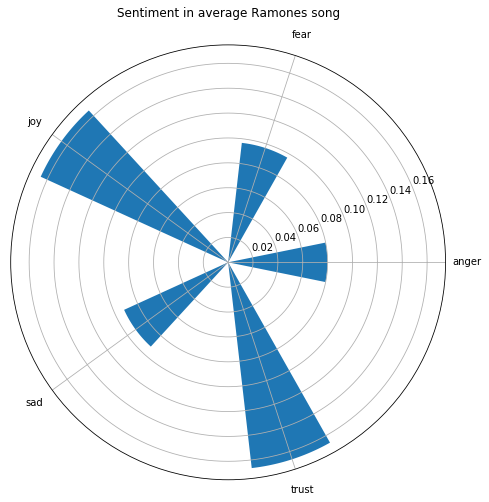

In [153]:
# Radar chart code from: https://stackoverflow.com/questions/42886076/matplotlib-radar-chart-axis-labels

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)

sample = ramones_df[['anger','fear','joy','sad','trust']].mean().tolist()
N = len(sample) 

theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
bars = ax.bar(theta, sample, width=0.4)

ax.set_xticks(theta)
ax.set_xticklabels(['anger','fear','joy','sad','trust'])
ax.yaxis.grid(True)
ax.set_title('Sentiment in average Ramones song')
plt.show()
fig.savefig('Ramones-Sentiment-v01.png')